In [19]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [20]:
#Load data with 600 most frequent data
max_words=5000
max_len=200
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_words)

In [21]:
#Take only first 3000 samples only for  trainig and testing set

x_train=x_train[:15000]
y_train=y_train[:15000]

x_test=x_test[:15000]
y_test=y_test[:15000]

In [22]:
#Pad /Truncate to fixed lenght

x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)

In [23]:
print("Training Data Shape: ",x_train.shape)
print("Test Data Shape: ",x_test.shape)

Training Data Shape:  (15000, 200)
Test Data Shape:  (15000, 200)


In [24]:
#Build RNN Model

model=models.Sequential([
    layers.Embedding(input_dim=max_words,output_dim=2048,input_length=max_len),
    layers.SimpleRNN(256,return_sequences=False),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')    
])

In [25]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
history=model.fit(
    x_train,y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 56s 580ms/step - accuracy: 0.5209 - loss: 0.7041 - val_accuracy: 0.6060 - val_loss: 0.6582
Epoch 2/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 570ms/step - accuracy: 0.6666 - loss: 0.5995 - val_accuracy: 0.7307 - val_loss: 0.5431
Epoch 3/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 570ms/step - accuracy: 0.7526 - loss: 0.5107 - val_accuracy: 0.7570 - val_loss: 0.5078


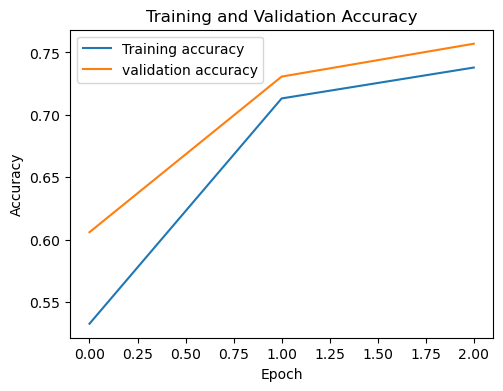

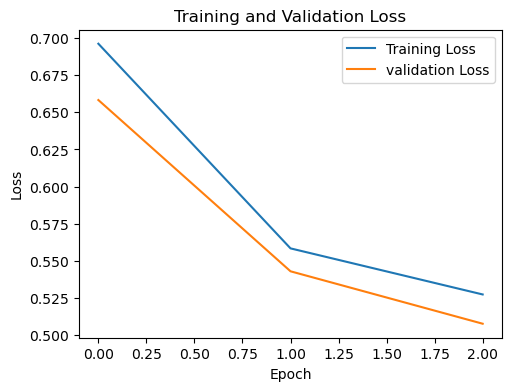

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()